In [18]:
import os
import pandas as pd
import sklearn
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv('stock_features/AAPL.csv')

In [4]:
df['Future_Close'] = df['Close'].shift(-1) # Shift future close price up
df['Target'] = (df['Future_Close'] > df['Close']).astype(int)

In [5]:
df.dropna(inplace=True) 

In [6]:
features = ['return_1d', 'return_5d', 'return_10d', 'log_return',
            'sma_20', 'sma_50','sma_200',
            'ema_9', 'ema_26', 'ema_50',
            'macd_9', 'macd_signal_9', 'macd_hist_9',
            'roc_10', 'slope_10', 'rolling_std_10','rolling_std_20','rolling_std_50',
            'atr_14', 'RSI_14', 'RSI_30',
            'bollinger_high', 'bollinger_low', 'bb_width',
            'zscore_20', 'volume_change_1d', 'volume_avg_20','volume_spike',
            'obv', 'OBV_100', 'OBV_50',
            'candle_body','upper_wick', 'lower_wick' ,'candle_range','body_ratio','doji_flag',
            'close_lag1', 'close_lag2', 'close_lag3','close_lag4', 'close_lag5',
            'return_lag1', 'return_lag2', 'return_lag3','return_lag4', 'return_lag5',
            'Stoch_Osc_14', 'Stoch_Signal_14',
            'fib_382', 'fib_500', 'fib_618' ]
X = df[features]
y = df['Target']


In [7]:
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [8]:
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (1852, 52), (1852,)
Testing data shape: (464, 52), (464,)


In [ ]:
model = XGBClassifier(objective='binary:logistic',
                      eval_metric='logloss',
                      use_label_encoder=False, # Suppress the warning
                      n_estimators=100,      # Number of boosting rounds (trees)
                      learning_rate=0.1,     # Step size shrinkage to prevent overfitting
                      max_depth=3,           # Maximum depth of a tree
                      subsample=0.8,         # Subsample ratio of the training instance
                      colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
                      random_state=42)       # For reproducibility

# Train the model


In [13]:
model.fit(X_train, y_train)
print("XGBoost model trained successfully!")

XGBoost model trained successfully!


/Users/muhammadabdullah/Documents/XGBoost/env1/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:00:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (Bullish)

print("\n--- Model Evaluation ---")
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Model Evaluation ---
Accuracy: 0.4418

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.77      0.56       212
           1       0.46      0.16      0.24       252

    accuracy                           0.44       464
   macro avg       0.45      0.47      0.40       464
weighted avg       0.45      0.44      0.39       464



In [20]:
import numpy as np
# Count predicted classes in the test set
unique, counts = np.unique(y_pred, return_counts=True)
pred_class_counts = dict(zip(unique, counts))
print("Predicted class counts on test set:", pred_class_counts)

Predicted class counts on test set: {0: 375, 1: 89}


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you trained with X_train (DataFrame) and model is fitted
importance = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print top features
print(feature_importance_df.head(45))


             Feature  Importance
37        close_lag1    0.037495
40        close_lag4    0.028395
29           OBV_100    0.026271
3         log_return    0.026005
36         doji_flag    0.025817
48   Stoch_Signal_14    0.024297
16    rolling_std_20    0.023345
20            RSI_30    0.022816
2         return_10d    0.022532
38        close_lag2    0.022425
14          slope_10    0.022390
22     bollinger_low    0.022310
45       return_lag4    0.022226
43       return_lag2    0.021014
19            RSI_14    0.020974
24         zscore_20    0.020966
11     macd_signal_9    0.020761
28               obv    0.020655
10            macd_9    0.020170
15    rolling_std_10    0.020057
6            sma_200    0.019973
44       return_lag3    0.019921
17    rolling_std_50    0.019906
12       macd_hist_9    0.019677
0          return_1d    0.019646
50           fib_500    0.019634
32        upper_wick    0.019593
34      candle_range    0.019062
26     volume_avg_20    0.018868
31       c

/var/folders/75/49ttglg519gd3g_sjwc146m80000gq/T/ipykernel_8643/2062760251.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


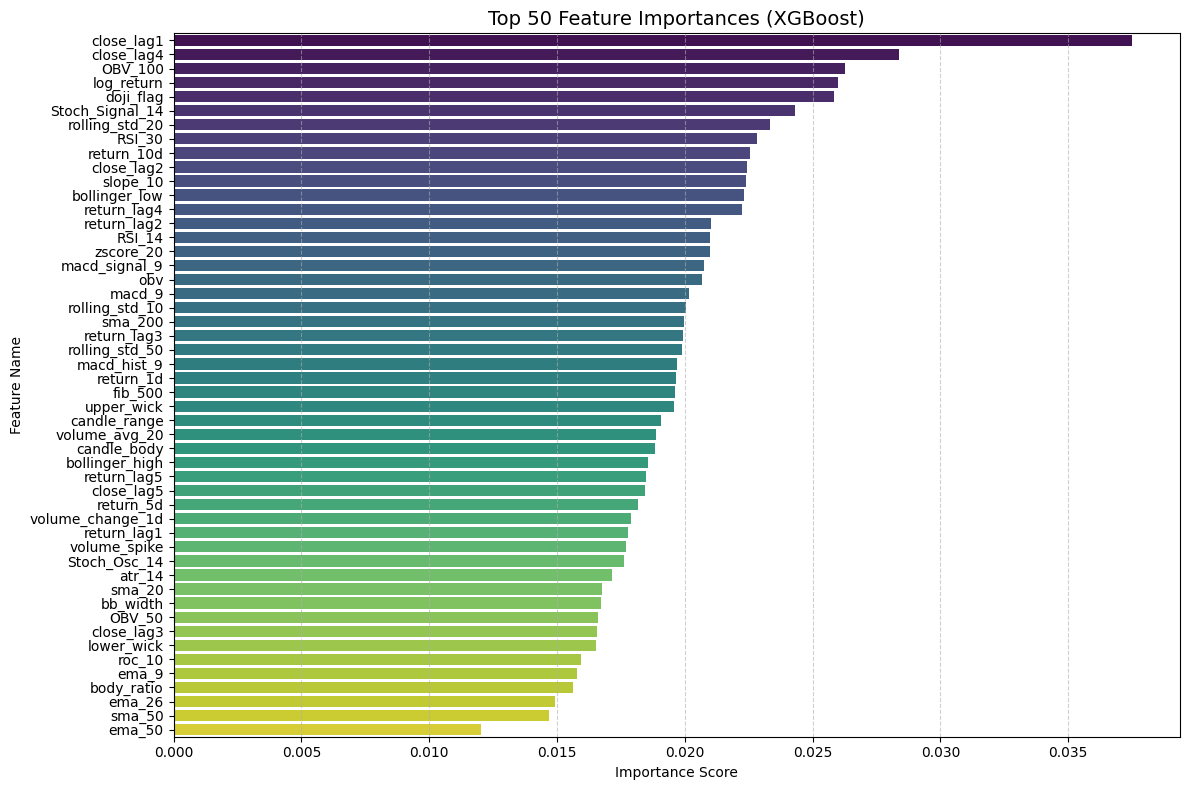

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model is trained and X_train is your DataFrame
importance = model.feature_importances_
feature_names = X_train.columns

# Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display top 30 features
top_n = 50
top_features = feature_importance_df.head(top_n)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')
plt.title(f'Top {top_n} Feature Importances (XGBoost)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
